In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [118]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


def regressione_lineare(X,y):
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    for idx, i in enumerate(X):
        print(f"beta {idx + 1}: {X.columns[idx]}")

    print("Coefficiente di regressione (pesi):", model.coef_)
    print("Intercetta:", model.intercept_)
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("R2 score:", r2_score(y_test, y_pred))

    lenght = y_pred.shape[0]
    x = np.linspace(0,lenght,lenght)
        
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y_test, name="real", mode="lines"))
    fig.add_trace(go.Scatter(x=x, y=y_pred, name="predicted", mode="lines"))
    fig.update_layout(title="Error from prediction on Test Set", xaxis_title="Obeservation", yaxis_title="Value",width=900)
    fig.show()

    df_predizioni = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
    print(f"questo oggetto è chiamato: df_predizioni {df_predizioni}")


In [119]:
df = pd.read_csv('house.csv')
house = pd.read_csv('house.csv')
house

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


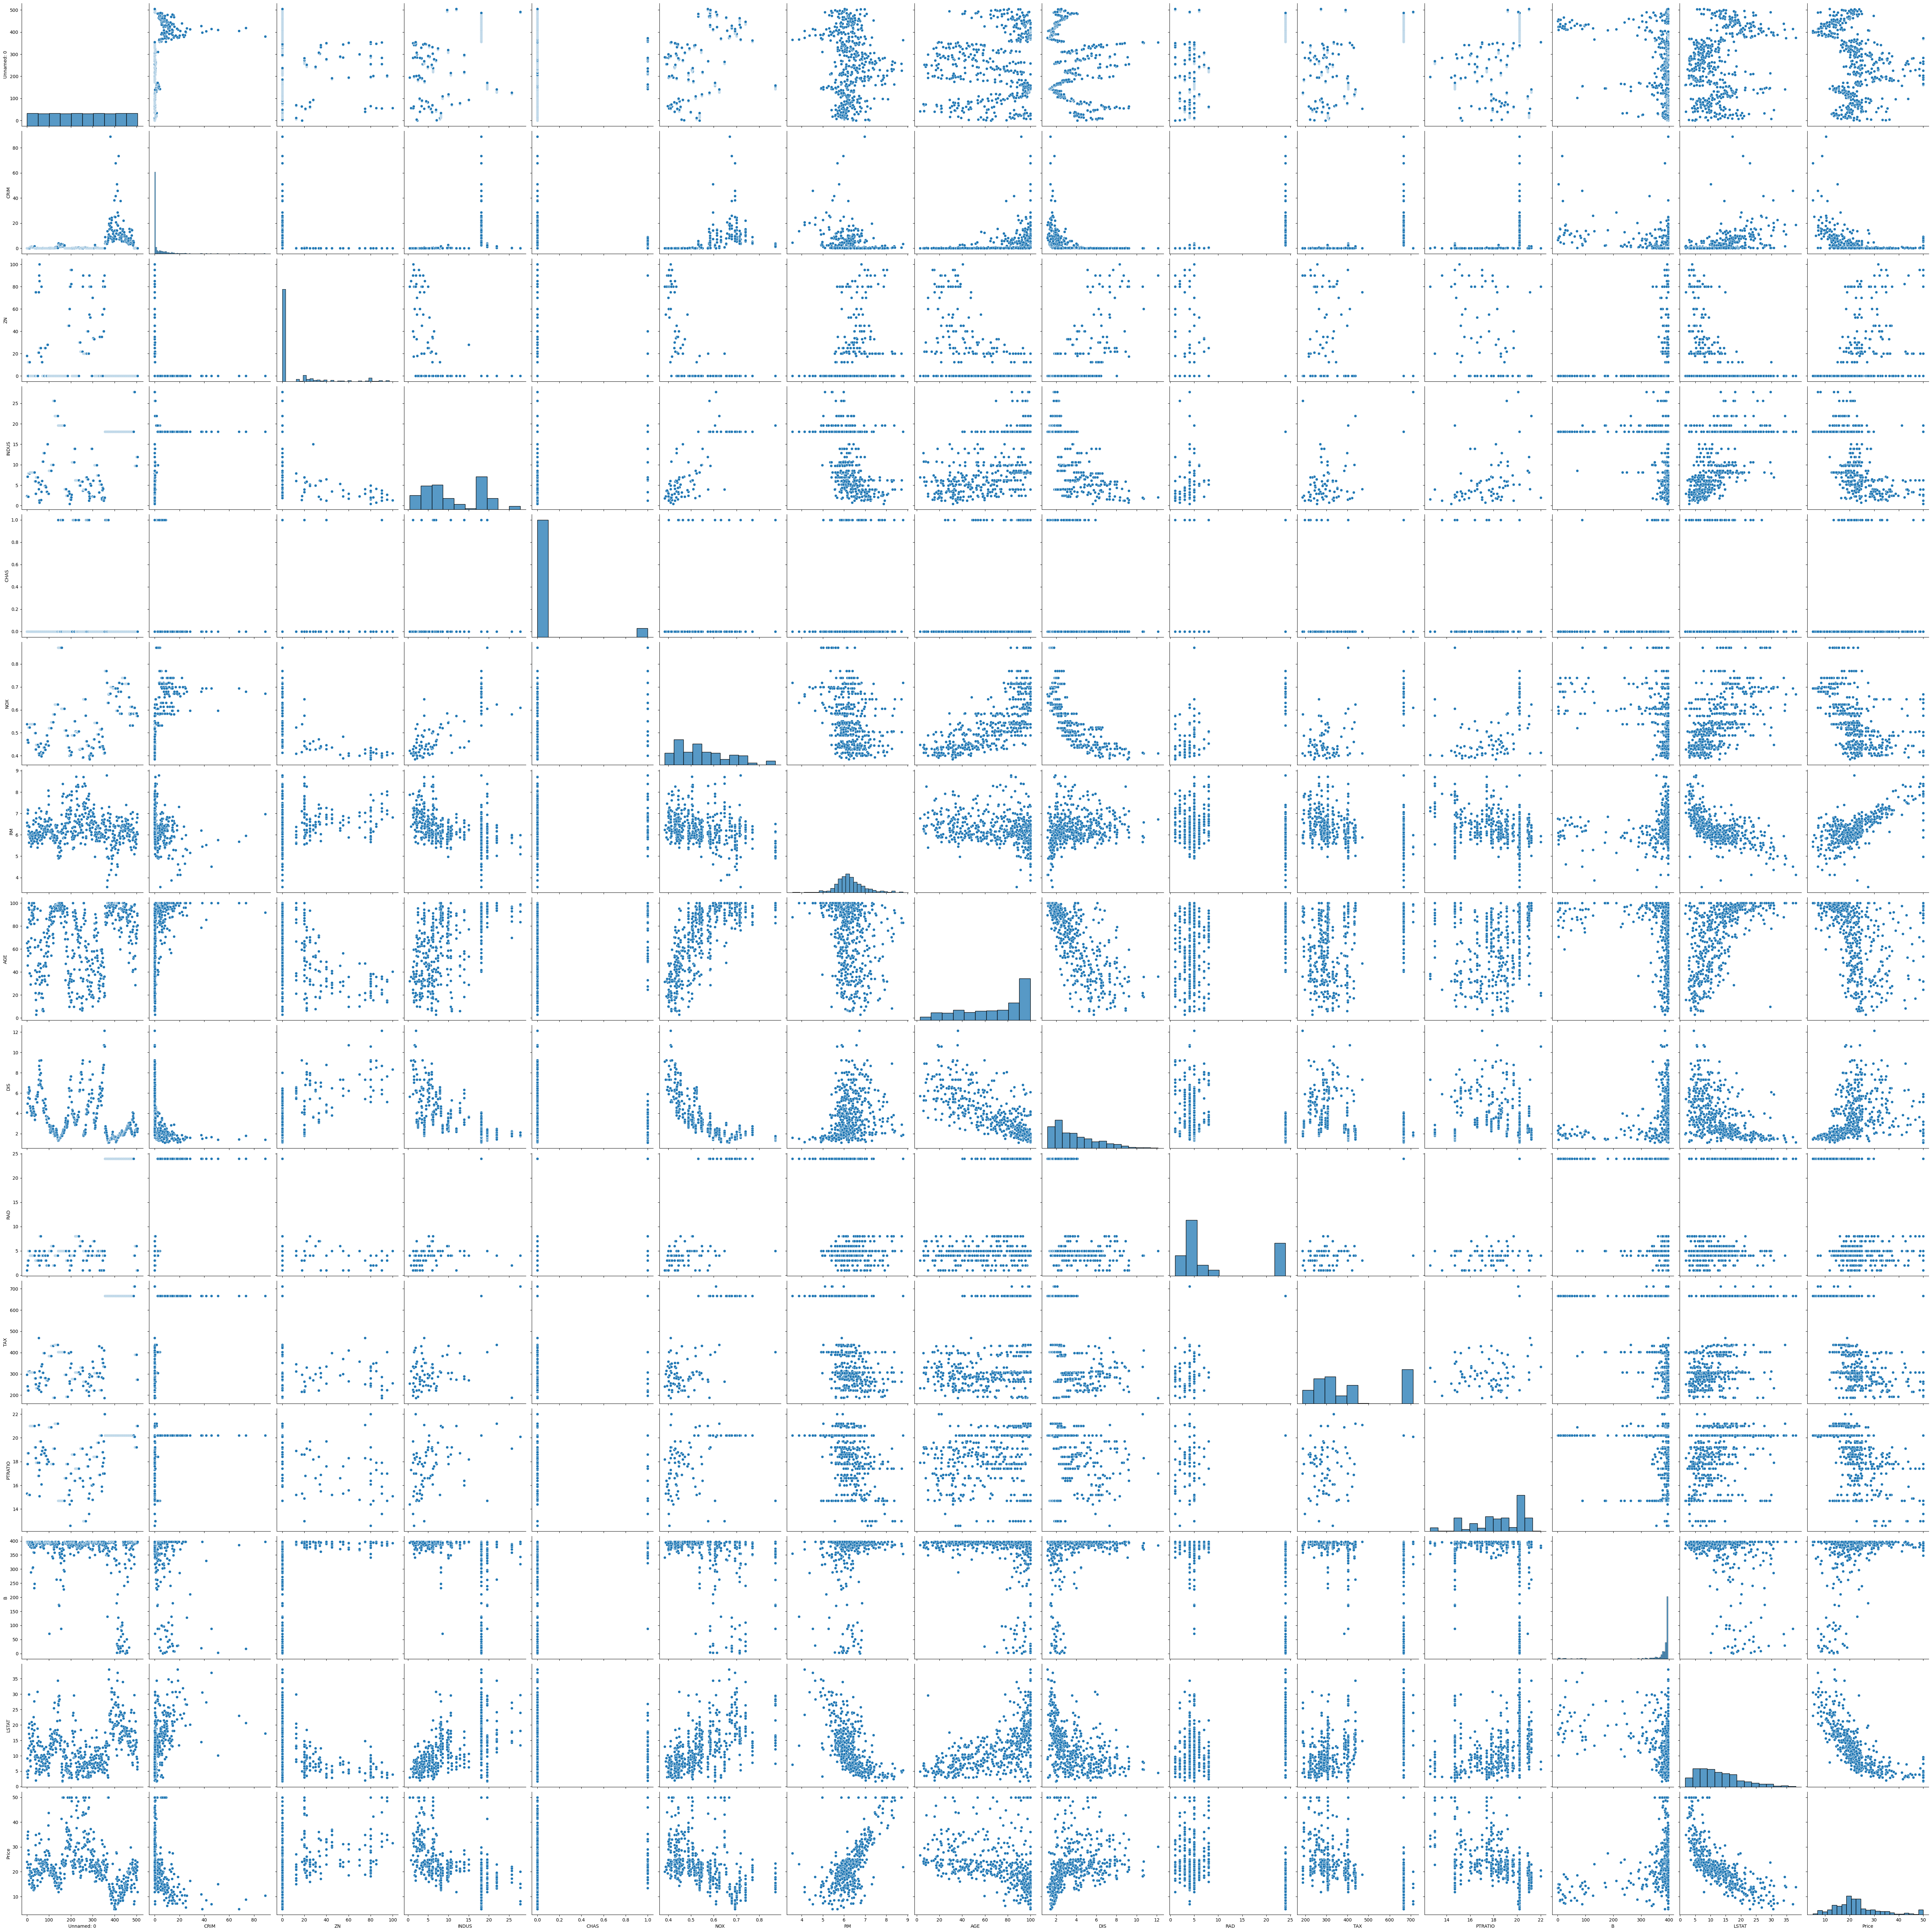

In [120]:
sns.pairplot(house,height=4,corner=False)

In [121]:
corr = house.corr()

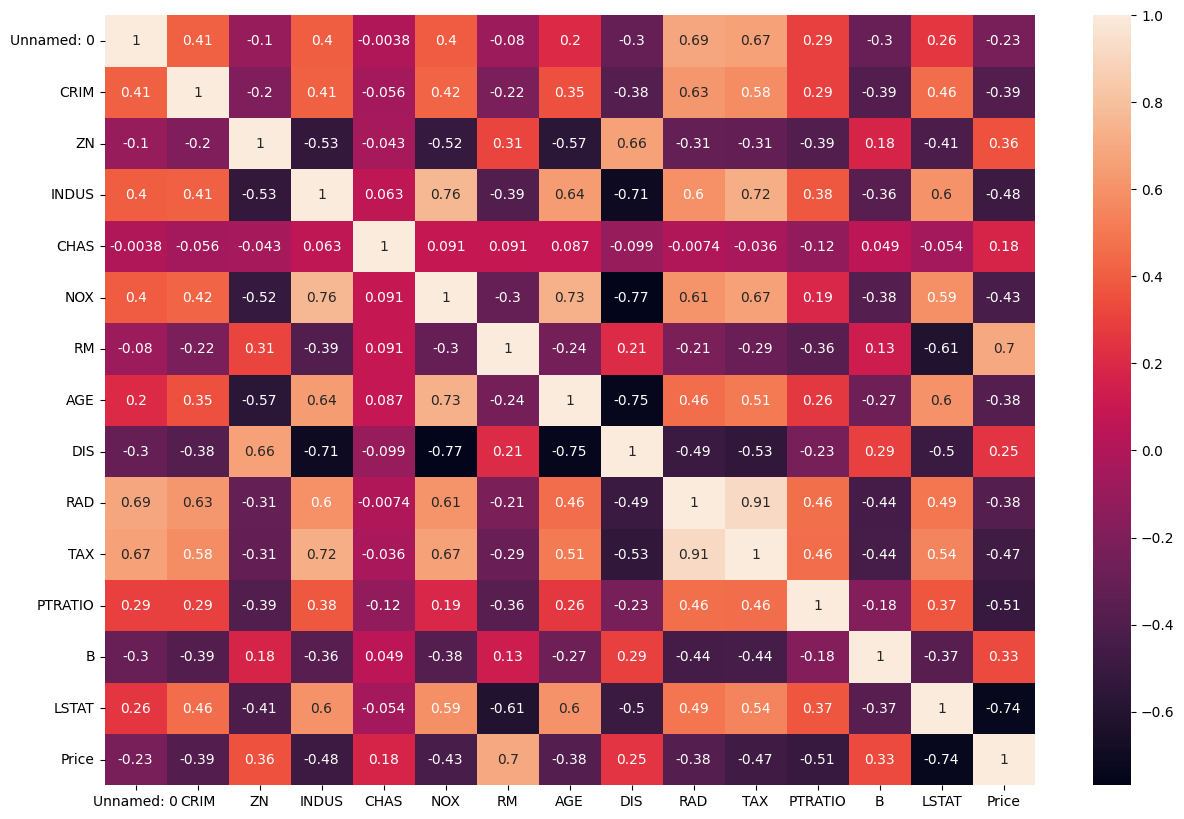

In [122]:
plt.figure(figsize=(15, 10))
sns.heatmap(house.corr(), annot=True)
plt.show()

In [126]:
X = house[["LSTAT","RM", "PTRATIO"]]
y = house["Price"]
regressione_lineare(X,y)

beta 1: LSTAT
beta 2: RM
beta 3: PTRATIO
Coefficiente di regressione (pesi): [-0.58238074  4.77579086 -0.85699595]
Intercetta: 15.647772155487665
Mean Squared Error (MSE): 25.688824196675952
R2 score: 0.6331590458194678


questo oggetto è chiamato: df_predizioni      y_test     y_pred
173    23.6  26.798392
274    32.4  30.783634
491    13.6  16.472090
72     22.8  24.943880
452    16.1  18.351894
..      ...        ...
418     8.8  14.777149
117    19.2  23.149759
42     25.3  26.385766
322    20.4  23.216872
347    23.1  27.722656

[127 rows x 2 columns]


In [128]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,252.500000,146.213884,0.00000,126.250000,252.50000,378.750000,505.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


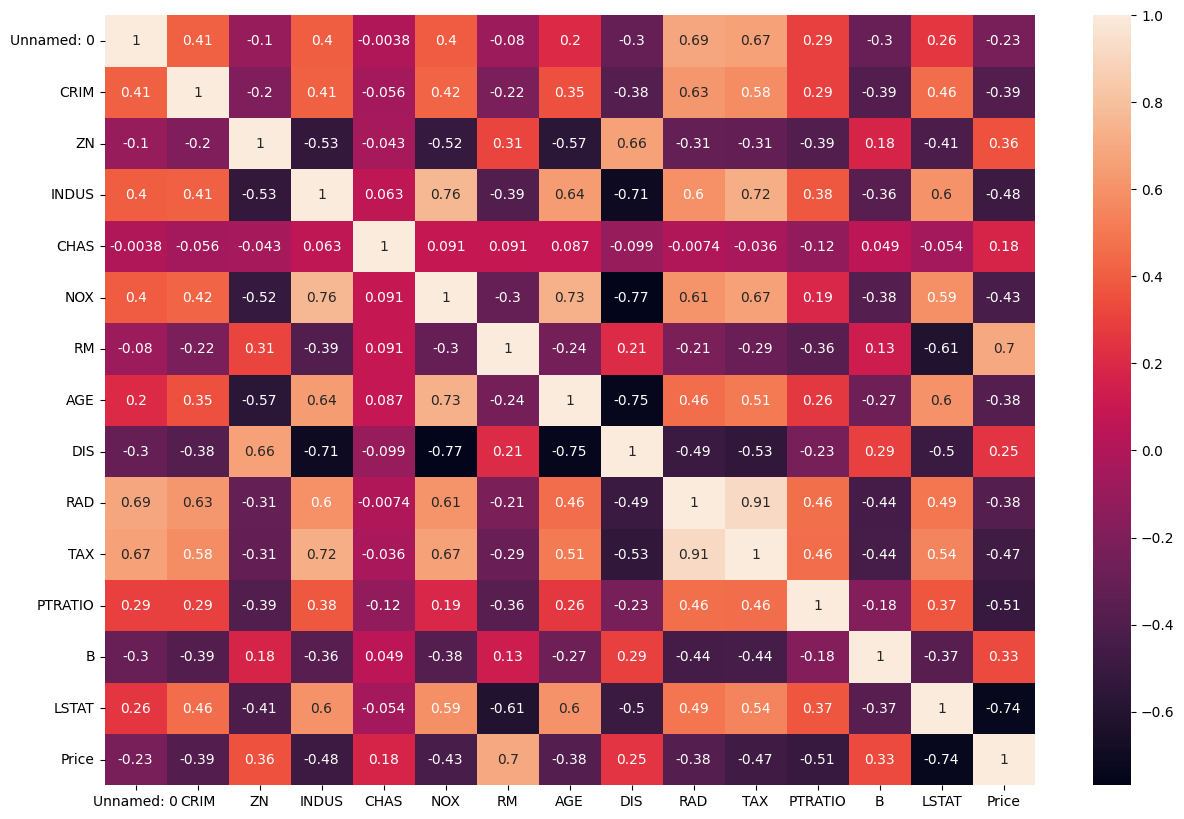

In [124]:
plt.figure(figsize=(15, 10))
sns.heatmap(house.corr(), annot=True)
plt.show()